In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
from data_preprocessing_final import cleaning, dummify_func

In [3]:
data = pd.read_csv('Ames_HousePrice.csv', index_col=0)

In [4]:
cleaned = cleaning(data)

In [5]:
x,y = dummify_func(cleaned)

In [6]:

y

,SalePrice
0,126000
1,139500
2,124900
3,114000
4,227000
...,...
2574,121000
2575,139600
2576,145000
2577,217500


In [7]:
x = x.drop('PID', axis = 1)
x

,GrLivArea,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,...,MiscVal_560,MiscVal_600,MiscVal_650,MiscVal_6500,MiscVal_700,MiscVal_750,MiscVal_80,MiscVal_800,MiscVal_8300,MiscVal_900
0,0.120221,0.030802,0.485507,0.000000,0.149742,0.000000,0.0,0.25,0.0,0.333333,...,0,0,0,0,0,0,0,0,0,0
1,0.164671,0.013718,0.811594,0.566667,0.205106,0.000000,0.0,0.50,0.0,0.333333,...,0,0,0,0,0,0,0,0,0,0
2,0.153616,0.022249,0.420290,0.950000,0.191337,0.000000,0.0,0.25,0.0,0.333333,...,0,0,0,0,0,0,0,0,0,0
3,0.162368,0.031999,0.202899,0.883333,0.109868,0.172009,0.0,0.25,0.0,0.333333,...,0,0,0,0,0,0,0,0,0,0
4,0.306541,0.033186,0.934783,0.850000,0.136546,0.456731,0.0,0.50,0.5,0.500000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,0.142331,0.035308,0.318841,0.000000,0.177281,0.000000,0.0,0.25,0.0,0.333333,...,0,0,0,0,0,0,0,0,0,0
2575,0.322202,0.057865,0.601449,0.083333,0.401320,0.000000,0.0,0.50,0.0,0.666667,...,0,0,0,0,0,0,0,0,0,0
2576,0.384155,0.023230,0.557971,0.000000,0.191337,0.534722,0.0,0.50,0.0,0.666667,...,0,0,0,0,0,0,0,0,0,0
2577,0.347305,0.035177,0.927536,0.833333,0.186747,0.457799,0.0,0.50,0.5,0.500000,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [9]:
tree_model = DecisionTreeRegressor(max_depth = None, random_state=0)

In [10]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
train_preds = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))

test_preds = tree_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))


Train set MSE is 0.000
Test set MSE is 1265372791.752


In [13]:
tree_model = DecisionTreeRegressor(max_depth = 20, random_state=0)
tree_model.fit(X_train, y_train)
train_preds = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))

test_preds = tree_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))


Train set MSE is 364014.122
Test set MSE is 1210118063.595


In [14]:
tree_model = DecisionTreeRegressor(max_depth = 10, random_state=0)
tree_model.fit(X_train, y_train)
train_preds = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))

test_preds = tree_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))


Train set MSE is 135105909.641
Test set MSE is 1242260973.427


In [15]:
tree_model = DecisionTreeRegressor(max_depth = 1, random_state=0)
tree_model.fit(X_train, y_train)
train_preds = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))

test_preds = tree_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))

Train set MSE is 3616235411.010
Test set MSE is 3830356493.867


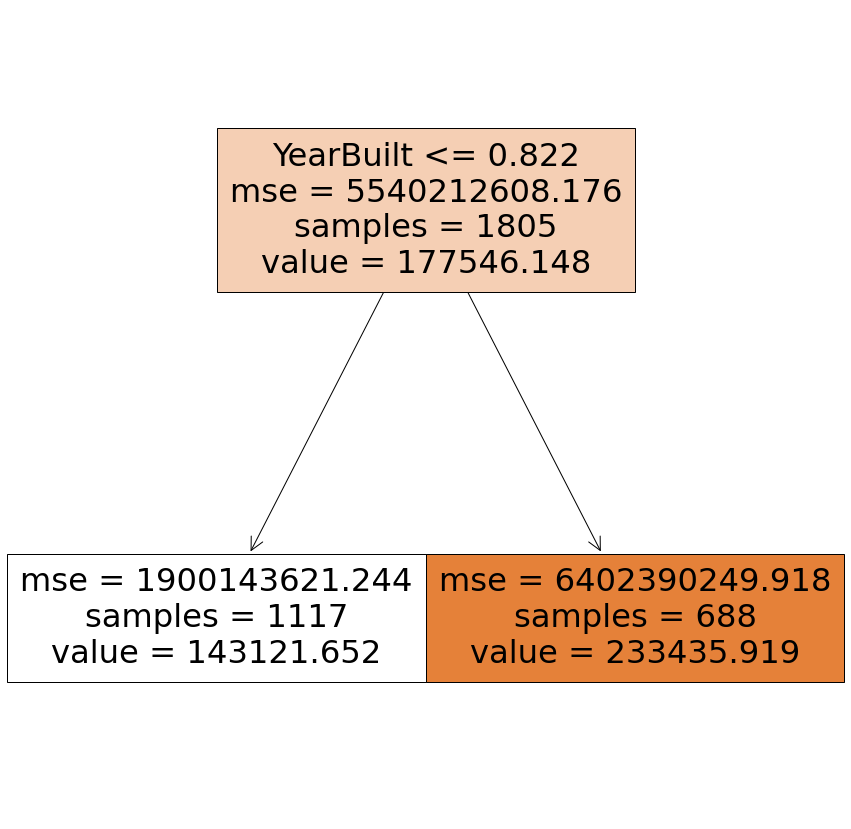

In [16]:
# Visualize the decision tree
plt.figure(figsize=(15,15))
plot_tree(tree_model,feature_names=x.columns,filled=True)
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

train_preds = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train,train_preds)
print('Train set MSE is {:.3f}'.format(train_mse))

test_preds = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test,test_preds)
print('Test set MSE is {:.3f}'.format(test_mse))


<ipython-input-21-3c74339173e4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Train set MSE is 99084334.942
Test set MSE is 581078153.764


In [22]:
def calc_feature_importances(model,feat_names,num_to_show):
    # Determine the relative importance of each feature using the random forest model
    importances = model.feature_importances_
    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    RF_ranking[:num_to_show][::-1].plot(x='Feature',y='Importance',kind='barh',figsize=(12,7),legend=False,title='RF Feature Importance')
    plt.show()
    return

<ipython-input-63-5ecbbee9e11e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


,Feat Index,Feature,Importance
0,4,1stFlrSF,0.034053
1,0,GrLivArea,0.033845
2,1,LotArea,0.033443
3,2,YearBuilt,0.029534
4,3,YearRemodAdd,0.027913
5,14,OpenPorchSF,0.023604
6,13,WoodDeckSF,0.023153
7,11,TotRmsAbvGrd,0.020402
8,5,2ndFlrSF,0.017417
9,9,BedroomAbvGr,0.014208


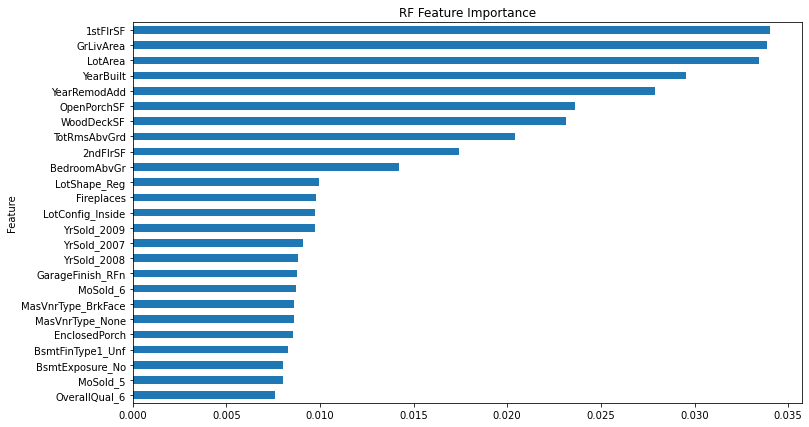

In [63]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
top_feats = 25
calc_feature_importances(rf_model,x.columns,top_feats)

In [ ]:
params = {'min_samples_leaf':[1,3],'n_estimators':[100,1000],
          'max_features':[1,None],'max_samples':[1,None]}

model = RandomForestRegressor()
grid_search = GridSearchCV(model,params)
grid_search.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

In [ ]:
grid_search.best_params_